<a href="https://colab.research.google.com/github/jeyatharani/assign/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170500096/170498071 [==============================] - 4s 0us/step
x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration : 0/300 => loss : 1.000004
iteration : 10/300 => loss : 0.819968
iteration : 20/300 => loss : 0.810078
iteration : 30/300 => loss : 0.804963
iteration : 40/300 => loss : 0.801610
iteration : 50/300 => loss : 0.799163
iteration : 60/300 => loss : 0.797247
iteration : 70/300 => loss : 0.795672
iteration : 80/300 => loss : 0.794336
iteration : 90/300 => loss : 0.793177
iteration : 100/300 => loss : 0.792155
iteration : 110/300 => loss : 0.791245
iteration : 120/300 => loss : 0.790427
iteration : 130/300 => loss : 0.789687
iteration : 140/300 => loss : 0.789013
iteration : 150/300 => loss : 0.788396
iteration : 160/300 => loss : 0.787828
iteration : 170/300 => loss : 0.787305
iteration : 180/300 => loss : 0.786820
iteration : 190/300 => loss : 0.786369
iteration : 200/300 => loss : 0.785948
iteration : 210/300 => loss : 0.785555
iteration : 220/300 => loss : 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

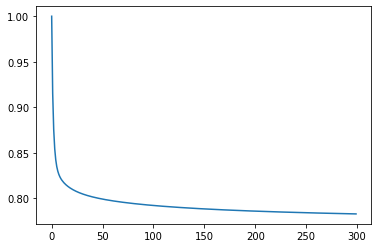

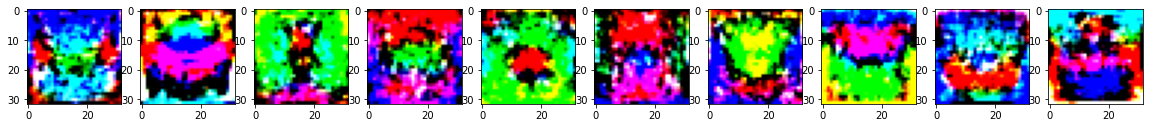

accuracy(test) =  0.4057 
accuracy(train) =  0.41948


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  Ypr=x.dot(w1)+b1
  ls_h=1/batch_size*np.square(Ypr-y).sum()+reg*np.sum(w1*w1)
  loss_history.append(ls_h)

  # Backward pass
  dYpr=1./batch_size*2.0*(Ypr-y)
  d_b1=dYpr.sum()
  b1-=lr*d_b1
  d_w1=x.T.dot(dYpr)+reg*w1
  w1-=lr*d_w1
  lr*=lr_decay

  if t%10==0:
    print('iteration : %d/%d => loss : %f'%(t,iterations,ls_h))

# Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

Ypr1=x_train.dot(w1)+b1
Ypr2=x_test.dot(w1)+b1
accuracy_trn=(Ntr-np.count_nonzero(np.abs(np.argmax(y_train,axis=1)-np.argmax(Ypr1,axis=1))))/Ntr
accuracy_tst=(Nte-np.count_nonzero(np.abs(np.argmax(y_test,axis=1)-np.argmax(Ypr2,axis=1))))/Nte
print('accuracy(test) = ',accuracy_tst, '\naccuracy(train) = ',accuracy_trn)
